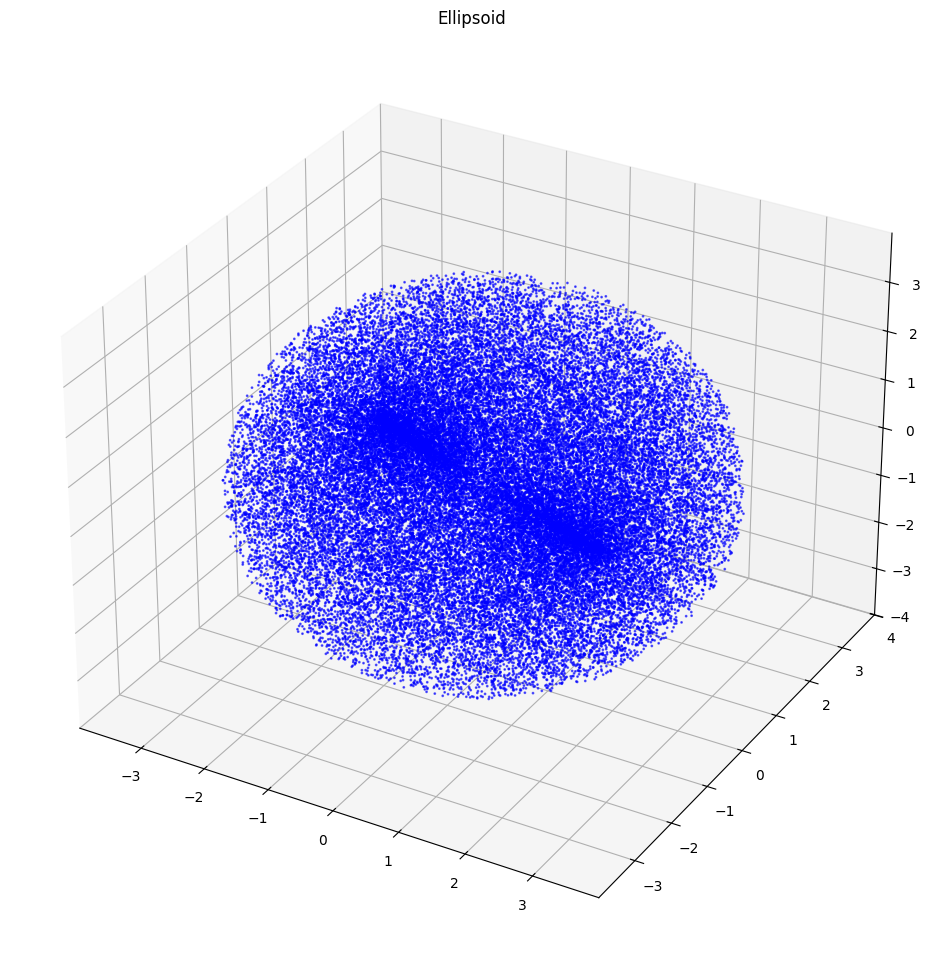

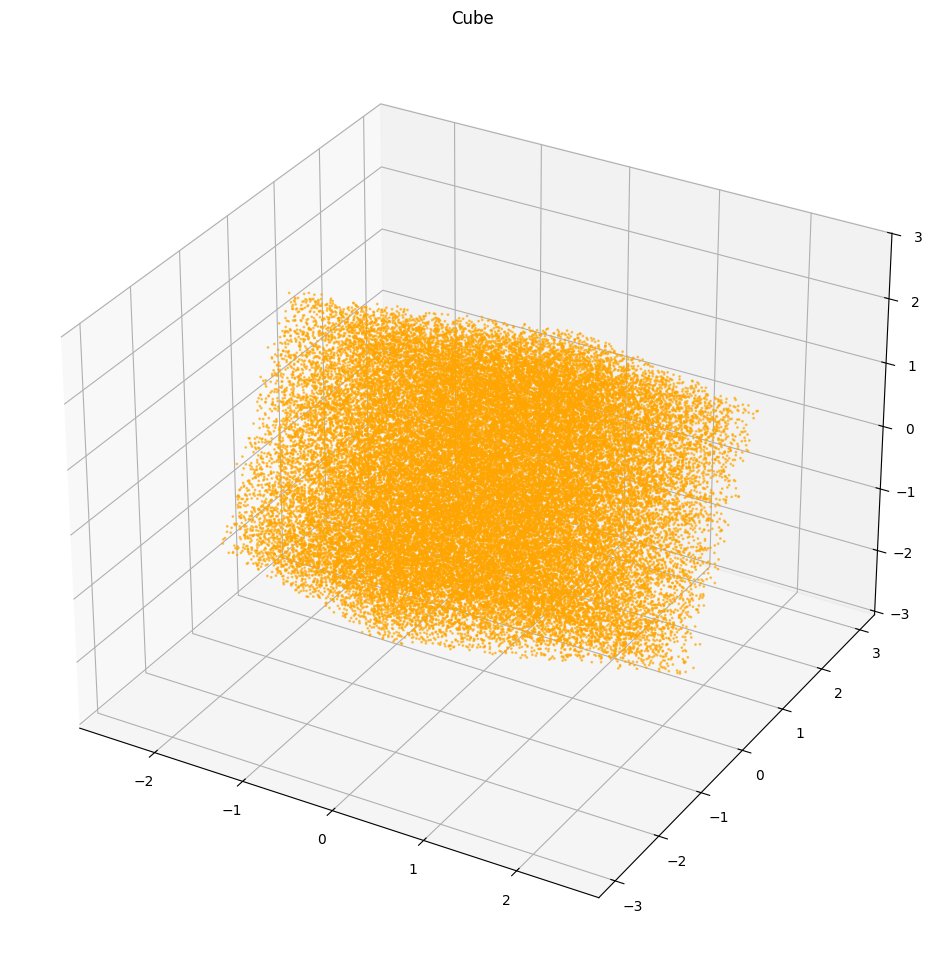

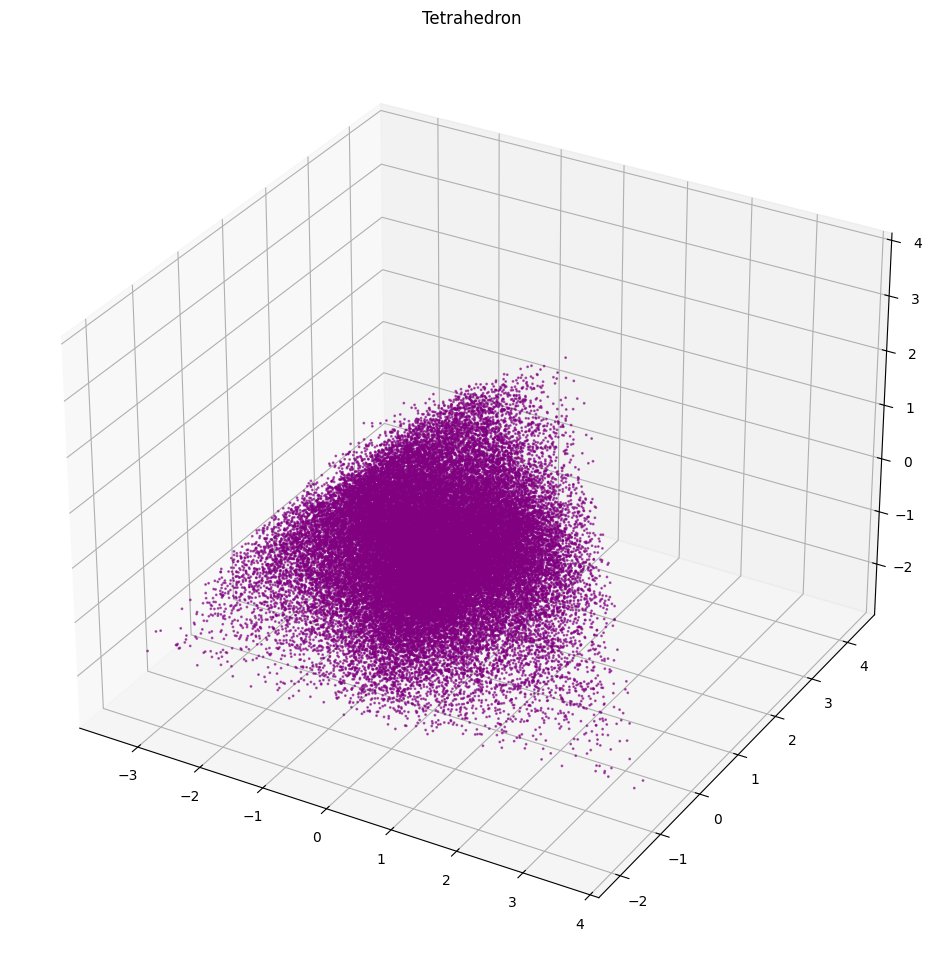

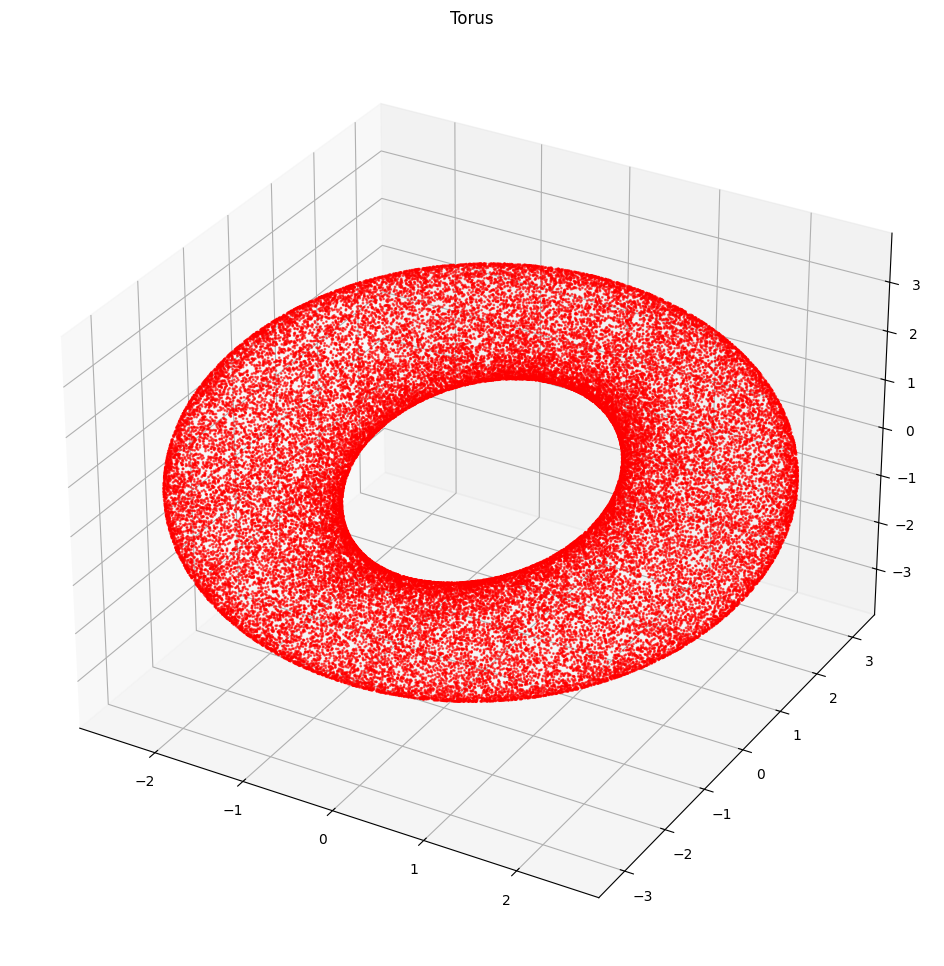

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate different shapes (ellipsoid, cube, tetrahedron, torus)
def generate_shape(shape_type, num_points, expansion_rate=1.0, theta_x=0,theta_y = 0, theta_z = 0):
    if shape_type == 'ellipsoid':
        # Generate Ellipsoid shape
        angles1 = np.random.uniform(0, 2 * np.pi, num_points)
        angles2 = np.random.uniform(0, np.pi, num_points)
        radii = np.random.uniform(0, 60, num_points)**(1/3)
        x = radii * np.sin(angles2) * np.cos(angles1)
        y = radii * np.sin(angles2) * np.sin(angles1)
        z = radii * np.cos(angles2)
        points = np.column_stack((x, y, z))
    
    elif shape_type == 'cube':
        # Generate Cube shape
        side_length = 4
        half_side = side_length / 2
        x = np.random.uniform(-half_side, half_side, num_points)
        y = np.random.uniform(-half_side, half_side, num_points)
        z = np.random.uniform(-half_side, half_side, num_points)
        points = np.column_stack((x, y, z))
    
    elif shape_type == 'tetrahedron':
        # Generate Tetrahedron shape
        vertices = np.array([[3,3, 3], [-3, -3, 3], [-3, 3, -3], [3, -3, -3]])
        weights = np.random.rand(num_points, 4)
        weights /= weights.sum(axis=1, keepdims=True)
        points = np.dot(weights, vertices)
    
    elif shape_type == 'torus':
        # Generate Torus shape'ellipsoid'um_points)  
        def generate_torus_points(R, r, num_points):
            theta = np.random.uniform(0, 2 * np.pi, num_points)  
            phi = np.random.uniform(0, 2 * np.pi, num_points)    
            x = (R + r * np.cos(phi)) * np.cos(theta)
            y = (R + r * np.cos(phi)) * np.sin(theta)
            z = r * np.sin(phi)
            return np.column_stack((x, y, z))

        points = generate_torus_points(3, 1, num_points)
    
    # Apply scaling
    scaling_matrix = np.array([[expansion_rate, 0, 0], [0, expansion_rate, 0], [0, 0, expansion_rate]])
    points = points @ scaling_matrix.T

    # Apply rotation
    R_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta_x), -np.sin(theta_x)],
    [0, np.sin(theta_x), np.cos(theta_x)]
    ])

    # Rotation matrix around y-axis
    R_y = np.array([
        [np.cos(theta_y), 0, np.sin(theta_y)],
        [0, 1, 0],
        [-np.sin(theta_y), 0, np.cos(theta_y)]
    ])

    # Rotation matrix around z-axis
    R_z = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0],
        [np.sin(theta_z), np.cos(theta_z), 0],
        [0, 0, 1]
    ])

    # Combine rotations (order matters)
    Rotation_matrix = R_z @ R_y @ R_x

    points = points @ Rotation_matrix.T

    return points

# Function to plot the generated shape
def plot_shape(points, shape_type):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    if shape_type == 'ellipsoid':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='blue', alpha=0.6)
        ax.set_title("Ellipsoid")
    elif shape_type == 'cube':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='orange', alpha=0.6)
        ax.set_title("Cube")
    elif shape_type == 'tetrahedron':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='purple', alpha=0.6)
        ax.set_title("Tetrahedron")
    elif shape_type == 'torus':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='red', alpha=0.6)
        ax.set_title("Torus")

    plt.show()



num_points = 50000
expansion_rate = np.random.uniform(0.8,1)
theta_x = np.radians(np.random.uniform(0, 360))
theta_y = np.radians(np.random.uniform(0, 360))
theta_z = np.radians(np.random.uniform(0, 360))
for shape_type in ['ellipsoid','cube','tetrahedron','torus']:
    points = generate_shape(shape_type, num_points, expansion_rate, theta_x,theta_y, theta_z)

    # Plot the full 3D shape
    plot_shape(points, shape_type)

In [22]:
import math
def pc_to_pointmap(
    pointcloud, voxel_size=0.125, x_y_z_bounds=[-4, 4]
):
    # takes a pointcloud and return a pointmap
    x_y_width = round((x_y_z_bounds[1] - x_y_z_bounds[0]) / voxel_size)
    z_width = round((x_y_z_bounds[1] - x_y_z_bounds[0]) / voxel_size)
    print(x_y_width,z_width)
    # change pointcloud start at zero (no negative number since pointmap indices are positive)
    pointcloud[:, 0] = pointcloud[:, 0] + abs(x_y_z_bounds[0])
    pointcloud[:, 1] = pointcloud[:, 1] + abs(x_y_z_bounds[0])
    pointcloud[:, 2] = pointcloud[:, 2] + abs(x_y_z_bounds[0])

    # create empty pointmap
    point_map = np.zeros((z_width, x_y_width, x_y_width), dtype=float)
    # compute which voxels to fill in the pointmap
    prec_vox_X = pointcloud[:, 0] / (x_y_z_bounds[1] - x_y_z_bounds[0])
    prec_vox_Y = pointcloud[:, 1] / (x_y_z_bounds[1] - x_y_z_bounds[0])
    prec_vox_Z = pointcloud[:, 2] / (x_y_z_bounds[1] - x_y_z_bounds[0])

    # for each point fill a point in the pointmap
    for idx, val in enumerate(prec_vox_X):
        point_map[
            math.floor(prec_vox_Y[idx] * z_width),
            math.floor(prec_vox_X[idx] * x_y_width),
            math.floor(prec_vox_Z[idx] * x_y_width),
        ] = 1.0

    return point_map

In [54]:
import numpy as np
from tqdm import tqdm

# Assuming you have the generate_shape and pc_to_pointmap functions implemented

def is_within_bounds(points, bounds=(-4, 4)):
    """Check if all points are within the given bounds."""
    min_bound, max_bound = bounds
    return np.all((points >= min_bound) & (points <= max_bound))

def generate_valid_instances(num_instances=1000, num_points=10000):
    """Generate a dataset of shapes with valid instances and store them."""
    bounds = (-4, 4)
    shape_types = ['ellipsoid', 'cube', 'tetrahedron', 'torus']
    dataset = {shape_type: [] for shape_type in shape_types}
    
    for shape_type in shape_types:
        with tqdm(total=num_instances, desc=f"Generating {shape_type}") as pbar:
            while len(dataset[shape_type]) < num_instances:
                expansion_rate = np.random.uniform(0.8, 1)
                theta_x = np.radians(np.random.uniform(0, 360))
                theta_y = np.radians(np.random.uniform(0, 360))
                theta_z = np.radians(np.random.uniform(0, 360))
                
                # Generate shape points
                points = generate_shape(shape_type, num_points, expansion_rate, theta_x, theta_y, theta_z)
                # Check if points are within the bounds
                if is_within_bounds(points, bounds):
                    dataset[shape_type].append(points)
                    pbar.update(1)  # Update progress bar
    
    # Save the dataset
    for shape_type, points_list in dataset.items():
        np.save(f'point_cloud/{shape_type}_dataset.npy', np.array(points_list))
        print(f"Saved {shape_type} dataset with {len(points_list)} samples.")
    
    return dataset

# Usage
num_instances = 1000
num_points = 50000  # Number of points per shape
dataset = generate_valid_instances(num_instances=num_instances, num_points=num_points)


Generating ellipsoid:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating torus: 100%|██████████| 1000/1000 [00:05<00:00, 175.40it/s]


Saved ellipsoid dataset with 1000 samples.
Saved cube dataset with 1000 samples.
Saved tetrahedron dataset with 1000 samples.
Saved torus dataset with 1000 samples.


1000
50000


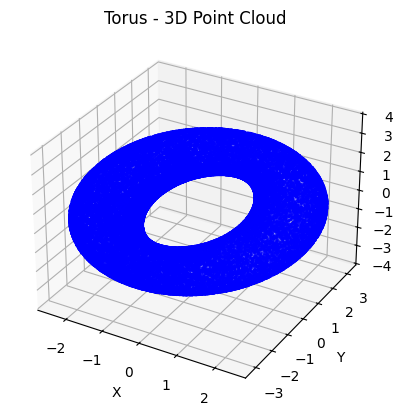

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (for example, ellipsoid)
shape_type = 'torus'  # Change this to cube, tetrahedron, or torus as needed
data = np.load(f'point_cloud/{shape_type}_dataset.npy')

# Pick one instance from the loaded data
print(len(data))
one_instance = data[0]  # Get the first instance (index 0)
print(len(one_instance))
# Visualize the point cloud (3D plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x = one_instance[:, 0]
y = one_instance[:, 1]
z = one_instance[:, 2]

# Plot the points
ax.scatter(x, y, z, c='b', marker='o', s=1)  # Small marker size for better visibility
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title
ax.set_title(f'{shape_type.capitalize()} - 3D Point Cloud')

# Show the plot
plt.show()


In [3]:
one_instance = data[0]  # Get the first instance (index 0)
pm =  pc_to_pointmap(one_instance, voxel_size=0.125, x_y_z_bounds=[-4, 4])


NameError: name 'data' is not defined

In [56]:
data.shape

(1000, 50000, 3)

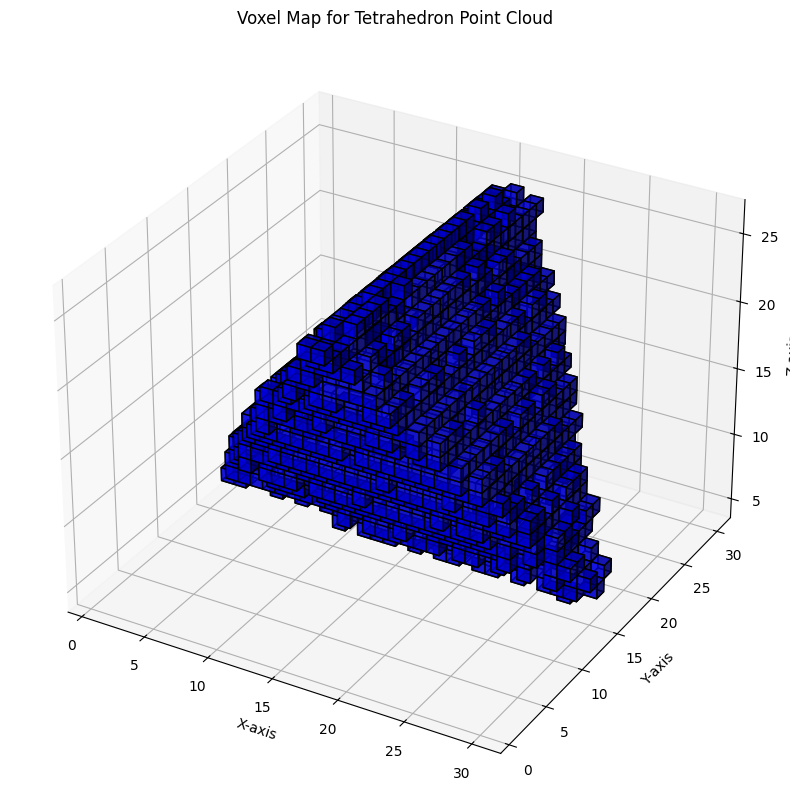

In [6]:
voxel_size = 0.125
grid_min, grid_max = -4, 4

# Calculate the number of voxels along each axis
num_voxels = int((grid_max - grid_min) / voxel_size)

# Create a 3D grid of zeros (voxel map)
voxel_map = np.zeros((num_voxels, num_voxels, num_voxels), dtype=np.uint8)
shape_type = 'tetrahedron'  # Change this to cube, tetrahedron, or torus as needed
data = np.load(f'point_cloud/{shape_type}_dataset.npy')
one_instance = data[0]
# Pick one instance from the loaded data


# Calculate the number of voxels along each axis
num_voxels = int((grid_max - grid_min) / voxel_size)

# Create a 3D grid of zeros (voxel map)
voxel_map = np.zeros((num_voxels, num_voxels, num_voxels), dtype=np.uint8)

# Convert point cloud data to voxel indices
indices = ((one_instance - grid_min) / voxel_size).astype(int)

# Fill the voxels corresponding to the point cloud
for i, j, k in indices:
    if 0 <= i < num_voxels and 0 <= j < num_voxels and 0 <= k < num_voxels:
        voxel_map[i, j, k] = 1

# Adjust grid dimensions to match the voxel map
x, y, z = np.indices(voxel_map.shape)

# Define filled_voxels based on the voxel_map
filled_voxels = (voxel_map == 1)

# Plot the voxel map using ax.voxels()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.voxels(filled_voxels, facecolors="blue", edgecolors="black", alpha=0.7)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Voxel Map for {shape_type.capitalize()} Point Cloud')

plt.show()

In [67]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Configuration
voxel_size = 0.125
grid_min, grid_max = -4, 4
num_voxels = int((grid_max - grid_min) / voxel_size)
output_dir = "voxel_datasets"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Shape types to process
shape_types = ['ellipsoid', 'cube', 'tetrahedron', 'torus']

for shape_type in shape_types:
    print(f"Processing shape: {shape_type}")
    # Load dataset for the shape
    data = np.load(f'point_cloud/{shape_type}_dataset.npy')
    num_instances = data.shape[0]

    # Prepare directory for the shape
    shape_output_dir = os.path.join(output_dir, shape_type)
    os.makedirs(shape_output_dir, exist_ok=True)

    # Iterate over instances with a progress bar
    for instance_idx in tqdm(range(num_instances), desc=f"Processing {shape_type}", unit="instance"):
        point_cloud = data[instance_idx]

        # Create a 3D grid of zeros (voxel map)
        voxel_map = np.zeros((num_voxels, num_voxels, num_voxels), dtype=np.uint8)

        # Convert point cloud data to voxel indices
        indices = ((point_cloud - grid_min) / voxel_size).astype(int)

        # Fill the voxels corresponding to the point cloud
        for i, j, k in indices:
            if 0 <= i < num_voxels and 0 <= j < num_voxels and 0 <= k < num_voxels:
                voxel_map[i, j, k] = 1

        # Save the voxel map
        output_path = os.path.join(shape_output_dir, f'instance_{instance_idx}.npy')
        np.save(output_path, voxel_map)

    print(f"Saved voxel maps for shape {shape_type}.")

print("All shapes processed and saved.")


Processing shape: ellipsoid


Processing ellipsoid: 100%|██████████| 1000/1000 [00:34<00:00, 29.40instance/s]


Saved voxel maps for shape ellipsoid.
Processing shape: cube


Processing cube: 100%|██████████| 1000/1000 [00:33<00:00, 29.44instance/s]


Saved voxel maps for shape cube.
Processing shape: tetrahedron


Processing tetrahedron: 100%|██████████| 1000/1000 [00:33<00:00, 29.48instance/s]


Saved voxel maps for shape tetrahedron.
Processing shape: torus


Processing torus: 100%|██████████| 1000/1000 [00:34<00:00, 29.31instance/s]

Saved voxel maps for shape torus.
All shapes processed and saved.


In [68]:
voxel_map = np.load('voxel_datasets/ellipsoid/instance_0.npy')
filled_voxels = (voxel_map == 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(filled_voxels, facecolors="blue", edgecolors="black", alpha=0.7)
ax.set_title("Voxelized Shape")
plt.show()


KeyboardInterrupt: 

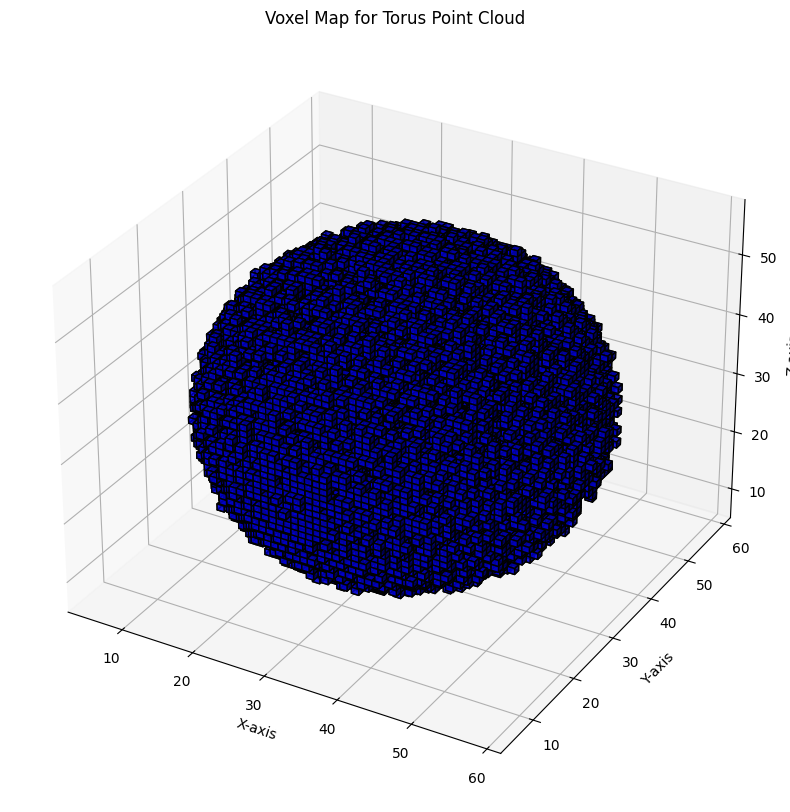

In [72]:
filled_voxels = (voxel_map == 1)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.voxels(filled_voxels, facecolors="blue", edgecolors="black", alpha=0.7)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Voxel Map for {shape_type.capitalize()} Point Cloud')

plt.show()